# Data Cleaning on Big Mart dataset

In [ ]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("bigmart.csv")
data.shape

(8523, 12)

In [ ]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Check the missing values

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data["Item_Weight"].fillna(data["Item_Weight"].mean(),inplace=True)
data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0],inplace=True)

In [ ]:
data.isnull().sum().sum()

0

### Check the outliers

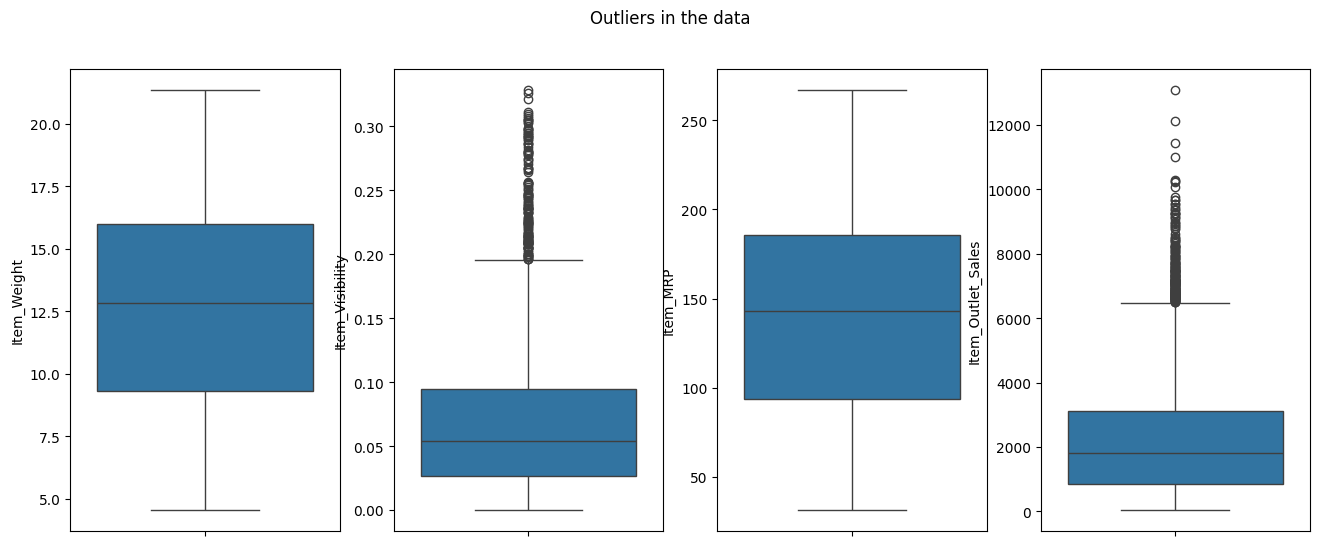

In [ ]:
plt.rcParams["figure.figsize"] = (16,6)

plt.subplot(1,4,1)
sns.boxplot(data["Item_Weight"])

plt.subplot(1,4,2)
sns.boxplot(data["Item_Visibility"])

plt.subplot(1,4,3)
sns.boxplot(data["Item_MRP"])

plt.subplot(1,4,4)
sns.boxplot(data["Item_Outlet_Sales"])

plt.suptitle("Outliers in the data")
plt.show()

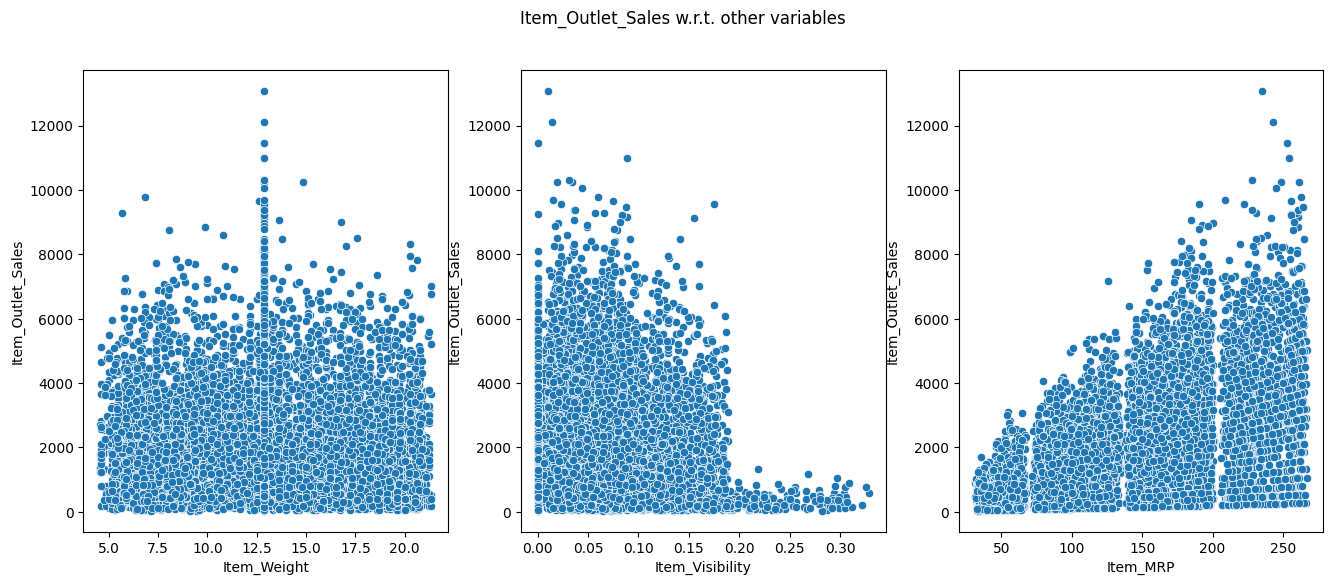

In [ ]:
plt.subplot(1,3,1)
sns.scatterplot(y=data["Item_Outlet_Sales"],x=data["Item_Weight"])

plt.subplot(1,3,2)
sns.scatterplot(y=data["Item_Outlet_Sales"],x=data["Item_Visibility"])

plt.subplot(1,3,3)
sns.scatterplot(y=data["Item_Outlet_Sales"],x=data["Item_MRP"])

plt.suptitle("Item_Outlet_Sales w.r.t. other variables")
plt.show()

In [ ]:
data = data[data["Item_Visibility"]<=0.20]

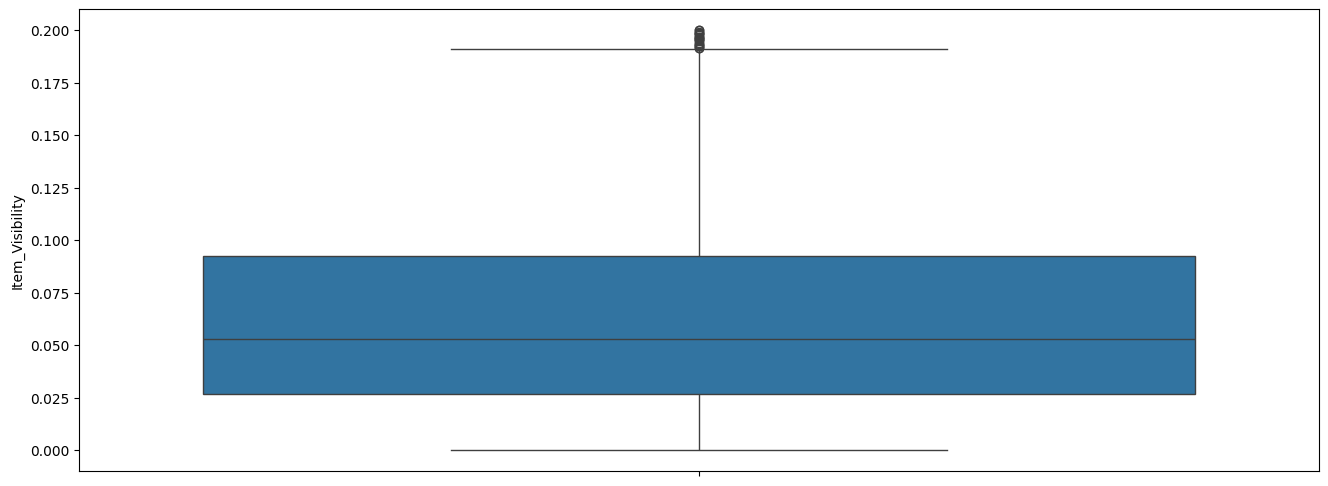

In [ ]:
sns.boxplot(data["Item_Visibility"])

plt.show()

In [ ]:
# Clean the item identifier

data["Item_Identifier"] = data["Item_Identifier"].apply(lambda x: x[0:2])

In [ ]:
data["Item_Identifier"].value_counts()

FD    6016
NC    1583
DR     790
Name: Item_Identifier, dtype: int64

In [ ]:
data["Item_Fat_Content"].value_counts()

Low Fat    5024
Regular    2832
LF          307
reg         117
low fat     109
Name: Item_Fat_Content, dtype: int64

In [ ]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(("LF","low fat","reg"),("Low Fat","Low Fat","Regular"))

In [ ]:
data["Item_Fat_Content"].value_counts()

Low Fat    5440
Regular    2949
Name: Item_Fat_Content, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=735df63f-eaf2-46ab-a8a5-7617b63b3308' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>